In [53]:
# Importing the libraries
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

# Import Library for splitting data
from sklearn.model_selection import train_test_split

# Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import export_text

from sklearn.inspection import DecisionBoundaryDisplay

Iris Dataset
---
The data set is stored in a 150x4 ndarray.  
Each row (iris) is described by four features (Sepal Length, Sepal Width, Petal Length and Petal Width). 
It has three different types of irises (Setosa, Versicolour, and Virginica). 

In [54]:
# Reading the Iris.csv file
iris_ds = load_iris()
columns_to_use = ["petal length (cm)", "petal width (cm)"]

# Extracting Attributes / Features
X = iris_ds.data[:, :2] #iris_ds.data

# Extracting Target / Class Labels
y = iris_ds.target

# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.25)

print(X_train.shape)
# Print first 5 rows of X_train
print(X_train[:5])
print(y_train.shape)
print(y_train[:5])

(112, 2)
[[5.  3.6]
 [5.2 4.1]
 [5.8 2.7]
 [6.  3.4]
 [6.7 3.1]]
(112,)
[0 0 2 1 1]


In [55]:
# Creating Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)

# Accuracy on the training dataset using the score method
print("Train data accuracy (using .score method):", decision_tree.score(X_train, y_train))

# Another way to get the accuracy on the training dataset: 
# First predict the label for X_train, then compare y_pred against true class label y_train
y_pred = decision_tree.predict(X_train)
print("Train data accuracy:", accuracy_score(y_train, y_pred))
#You see the training here did 1 mistake and thus accuracy is 149/150 = 0.993

# Accuracy on the training dataset using the score method
print("Test data accuracy (using .score method):", decision_tree.score(X_test, y_test))

# Predicting the class labels for Test Data
y_pred = decision_tree.predict(X_test)
print("Test data accuracy:", accuracy_score(y_true = y_test, y_pred=y_pred))


Train data accuracy (using .score method): 0.9553571428571429
Train data accuracy: 0.9553571428571429
Test data accuracy (using .score method): 0.631578947368421
Test data accuracy: 0.631578947368421


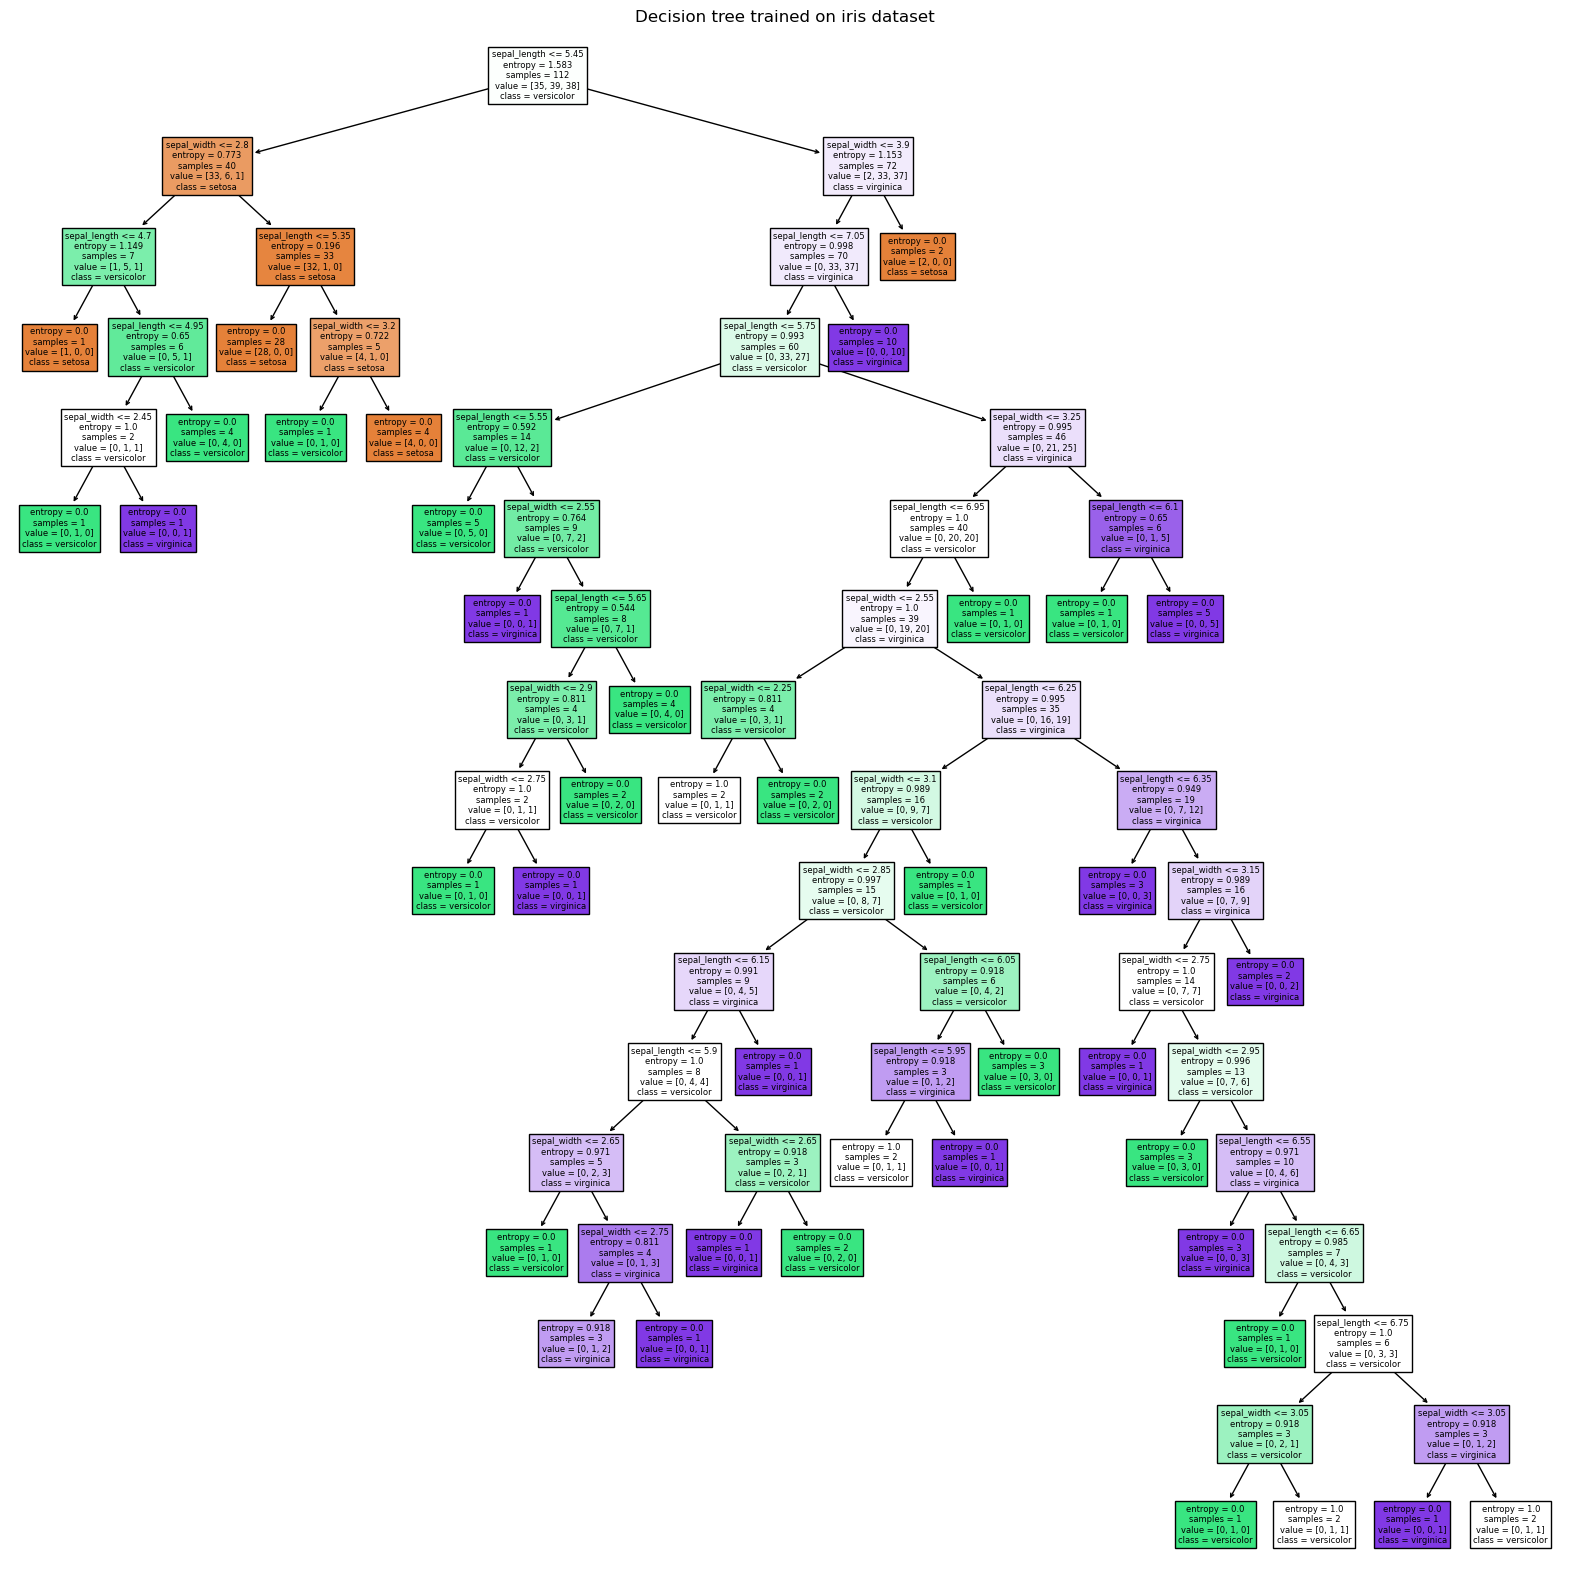

In [56]:
# Plotting the Decision Tree
plt.figure(figsize=(20,20))
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plot_tree(decision_tree, filled=True, feature_names=col_names, class_names=iris_ds.target_names)
plt.title("Decision tree trained on iris dataset")
plt.show()

*Restricting the tree depth (number of levels) to 2: Asking at most two questions in any path of the tree*

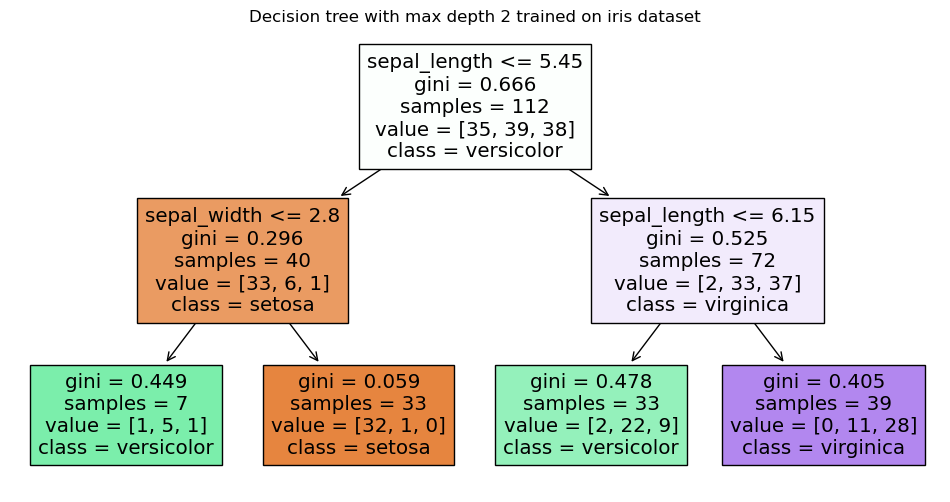

Train data accuracy: 0.7767857142857143
Test data accuracy: 0.7631578947368421


In [57]:
decision_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
decision_tree = decision_tree.fit(X_train, y_train)
plt.figure(figsize=(12,6))
col_names = ['sepal_length', 'sepal_width']
plot_tree(decision_tree, filled=True, feature_names=col_names, class_names=iris_ds.target_names)
plt.title("Decision tree with max depth 2 trained on iris dataset")
plt.show()

print("Train data accuracy:", decision_tree.score(X_train, y_train))
print("Test data accuracy:", decision_tree.score(X_test, y_test))

In [58]:
# Print the text representation of the tree
tree_text = export_text(decision_tree, feature_names=columns_to_use)
print(tree_text)

|--- petal length (cm) <= 5.45
|   |--- petal width (cm) <= 2.80
|   |   |--- class: 1
|   |--- petal width (cm) >  2.80
|   |   |--- class: 0
|--- petal length (cm) >  5.45
|   |--- petal length (cm) <= 6.15
|   |   |--- class: 1
|   |--- petal length (cm) >  6.15
|   |   |--- class: 2

